In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
features = iris.data
label = iris.target
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=156)
dt_clf = DecisionTreeClassifier(random_state=156)

## Confusion Matrix of Multi Class Classification


In [8]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)

In [24]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9666666666666667

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,pred)
cm

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 12]], dtype=int64)

In [18]:
cm_df = pd.DataFrame(cm,index=iris.target_names,columns=iris.target_names)
cm_df

,setosa,versicolor,virginica
setosa,9,0,0
versicolor,0,8,1
virginica,0,0,12


In [23]:
clf_report = classification_report(y_test,pred,labels=list(set(iris.target)),target_names=iris.target_names,output_dict=True)
pd.DataFrame(clf_report)

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.923077,0.966667,0.974359,0.969231
recall,1.0,0.888889,1.000000,0.966667,0.962963,0.966667
f1-score,1.0,0.941176,0.960000,0.966667,0.967059,0.966353
support,9.0,9.000000,12.000000,0.966667,30.000000,30.000000


## Multi class Precision-Recall Curve

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [7]:
mnist = load_digits()
y = mnist.target
y = y.astype(np.uint8)
n_classes = len(set(y))
Y = label_binarize(mnist.target,classes = [*range(n_classes)])
Y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,Y,random_state=42)
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,max_depth=3,random_state=0))
clf.fit(X_train,y_train)
y_score = clf.predict_proba(X_test)

In [14]:
y_score

array([[0.01986398, 0.03384679, 0.06714057, ..., 0.03734862, 0.05484386,
        0.08501565],
       [0.00952007, 0.01104366, 0.06944838, ..., 0.02878669, 0.03095692,
        0.31271585],
       [0.00192366, 0.01675331, 0.06249261, ..., 0.00686954, 0.08636398,
        0.13757973],
       ...,
       [0.01458497, 0.03112741, 0.46456559, ..., 0.00819722, 0.08495401,
        0.02877968],
       [0.10709826, 0.0212667 , 0.0270449 , ..., 0.00548875, 0.02517111,
        0.02262085],
       [0.02246797, 0.08035837, 0.1048942 , ..., 0.15051598, 0.07845483,
        0.03820836]])

In [13]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

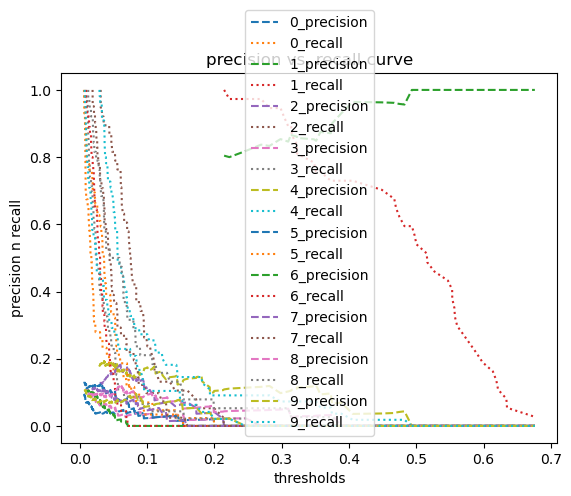

In [17]:
precision = dict()
recall = dict() 
for i in range(n_classes):
    precision[i] , recall[i] , thresholds = precision_recall_curve(y_test[:,i],y_score[:,1])
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precision[i][0:threshold_boundary],linestyle='--',label='{}_precision'.format(i))
    plt.plot(thresholds,recall[i][0:threshold_boundary],linestyle=':',label='{}_recall'.format(i))
#     plt.plot(recall[i],precision[i],lw=2,label='class {}'.format(i))
plt.xlabel("thresholds")
plt.ylabel("precision n recall")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

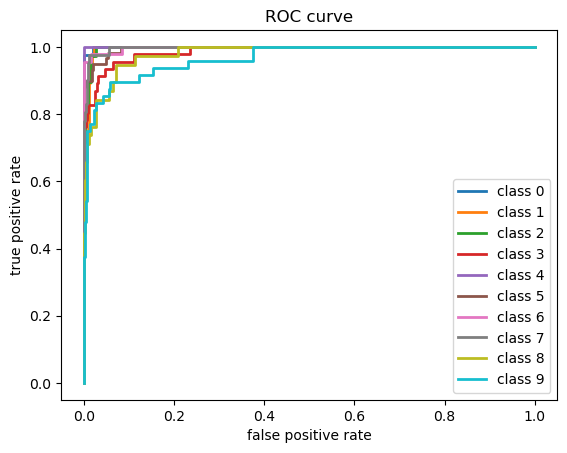

In [12]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [19]:
import pandas as pd
mnist = pd.read_csv('../../../review_proj/data/mnist_784.csv')
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [21]:
features = mnist.drop('class',axis=1)
y = mnist['class']
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(y, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=0))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

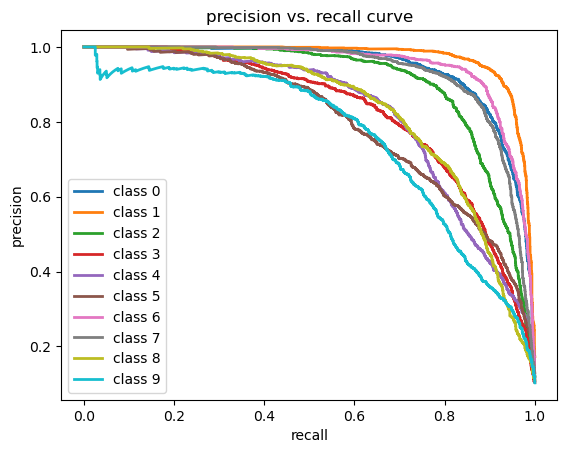

In [22]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
data = [*range(0,1358)]
ms.fit_transform(np.array(data).reshape(-1,1))
len(data)

1358

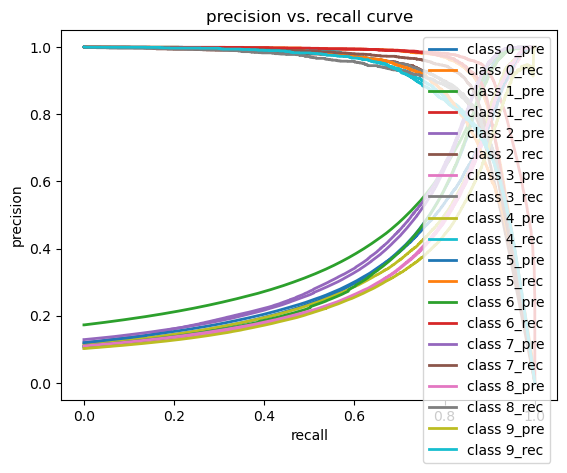

In [28]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], thresholds = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    mms = MinMaxScaler()
    thresholds_precision = mms.fit_transform(np.array([*range(0,precision[i].shape[0])]).reshape(-1,1)).reshape(-1)
    thresholds_recall = mms.fit_transform(np.array([*range(0,recall[i].shape[0])]).reshape(-1,1)).reshape(-1)
    plt.plot(thresholds_precision, precision[i], lw=2, label='class {}_pre'.format(i))
    plt.plot(thresholds_recall, recall[i], lw=2, label='class {}_rec'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()